# Visão Computacional: O Guia Completo - Segmentação de imagens com Mask R-CNN

# Download do repositório

> Observação: Após uma atualização no Colab em dezembro de 2022, a versão 1.x do Tensorflow não está mais acessível. Portanto, vamos usar a versão atualizada do repositório oficial, que possui suporte para as versões mais recentes do Tensorflow.

> Mais algumas pequenas mudanças são necessárias (estão demonstradas ao longo desse Colab)
 * Mudar o repositório a ser clonado (https://github.com/alsombra/Mask_RCNN-TF2)
 * Executar comando `!pip install -r requirements.txt`
 * Adicionar código de compatibilidade (as 5 linhas de código que estão abaixo do título "[ ! ] Atualização de compatibilidade", que está presente mais abaixo nesse mesmo Colab)
 * Remover os comandos de downgrade do h5py (já foi retirado nesse Colab)
 * Além disso, nos últimos releases do tensorflow há um bug que ainda não foi resolvido, portanto para garantir maior compatibilidade você pode especificar uma versão fixa como a 2.15.0 (através desse comando `!pip install tensorflow==2.15.0` que já está nesse colab)

In [ ]:
!git clone https://github.com/alsombra/Mask_RCNN-TF2/ # repositório atualizado

Cloning into 'Mask_RCNN-TF2'...
remote: Enumerating objects: 1004, done.
remote: Total 1004 (delta 0), reused 0 (delta 0), pack-reused 1004 (from 1)
Receiving objects: 100% (1004/1004), 137.72 MiB | 22.23 MiB/s, done.
Resolving deltas: 100% (588/588), done.


In [ ]:
!mv Mask_RCNN-TF2 Mask_RCNN # renomeia o diretório para Mask_RCNN (tira o '-TF2'), assim não precisamos atualizar no código onde`tem 'Mask_RCNN'

In [ ]:
%cd Mask_RCNN/

/content/Mask_RCNN


In [ ]:
pwd

'/content/Mask_RCNN'

In [ ]:
!pip install -r requirements.txt #

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.0/125.0 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.9/83.9 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 7.9 MB/s eta 0:00:00


In [ ]:
!python setup.py install

/content/Mask_RCNN/setup.py:9: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources
/usr/local/lib/python3.10/dist-packages/setuptools/dist.py:452: SetuptoolsDeprecationWarning: Invalid dash-separated options
!!

        ********************************************************************************
        Usage of dash-separated 'description-file' will not be supported in future
        versions. Please use the underscore name 'description_file' instead.

        This deprecation is overdue, please update your project and remove deprecated
        calls to avoid build errors in the future.

        See https://setuptools.pypa.io/en/latest/userguide/declarative_config.html for details.
        ********************************************************************************

!!
  opt = self.warn_dash_deprecation(opt, section)
/usr/local/lib/python3.10/dist-packages/setuptools/dist.py:452: Setuptoo

In [ ]:
%cd ..

/content


In [ ]:
pwd

'/content'

# Importação das bibliotecas

In [ ]:
!pip install tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 89.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.0 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard
    Found existing installation

In [ ]:
!pip install numpy==1.23

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 89.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.19 requires numpy>=1.24.4, but you have numpy 1.23.0 which is incompatible.
albumentations 1.4.20 requires numpy>=1.24.4, but you have numpy 1.23.0 which is incompatible.
bigframes 1.25.0 requires numpy>=1.24.0, but you have numpy 1.23.0 which is incompatible.
chex 0.1.87 requires numpy>=1.24.1, but you have numpy 1.23.0 which is incompatible.
ibis-framework 9.2.0 requires numpy<3,>=1.23.2, but you have numpy 1.23.0 which is incompatible.
jax 0.4.33 requires numpy>=1.24, but you have numpy 1.23.0 which is incompatible.
jaxlib 0.4.33 requires numpy>=1.24, but you have numpy 1.

In [ ]:
import os
import sys
import cv2
import numpy as np
import skimage.io
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.15.0'

In [ ]:
ROOT_DIR = os.path.abspath('./Mask_RCNN')
ROOT_DIR

'/content/Mask_RCNN'

In [ ]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/mask_rcnn-2.1-py3.10.egg',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/usr/local/lib/python3.10/dist-packages/setuptools/_vendor',
 '/root/.ipython']

In [ ]:
sys.path.append(ROOT_DIR)

In [ ]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/mask_rcnn-2.1-py3.10.egg',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/usr/local/lib/python3.10/dist-packages/setuptools/_vendor',
 '/root/.ipython',
 '/content/Mask_RCNN']

In [ ]:
from mrcnn import utils
from mrcnn import visualize
import mrcnn.model as modellib

In [ ]:
# https://cocodataset.org/#home
sys.path.append(os.path.join(ROOT_DIR, 'samples/coco/'))

In [ ]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/mask_rcnn-2.1-py3.10.egg',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/usr/local/lib/python3.10/dist-packages/setuptools/_vendor',
 '/root/.ipython',
 '/content/Mask_RCNN',
 '/',
 '/content/Mask_RCNN/samples/coco/']

In [ ]:
import coco

In [ ]:
MODEL_DIR = os.path.join(ROOT_DIR, 'logs')
IMAGE_DIR = os.path.join(ROOT_DIR, 'images')


In [ ]:
MODEL_DIR

'/content/Mask_RCNN/logs'

In [ ]:
IMAGE_DIR

'/content/Mask_RCNN/images'

## Carregamento da rede neural pré treinada

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
COCO_MODEL_PATH = os.path.join(ROOT_DIR, 'mask_rcnn_coco.h5')
COCO_MODEL_PATH

'/content/Mask_RCNN/mask_rcnn_coco.h5'

In [ ]:
utils.download_trained_weights(COCO_MODEL_PATH)

... done downloading pretrained model!


In [ ]:
class InferenceConfig(coco.CocoConfig):
  GPU_COUNT = 1
  IMAGES_PER_GPU = 1

In [ ]:
config = InferenceConfig()

In [ ]:
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [ ]:
network = modellib.MaskRCNN(mode='inference', model_dir=MODEL_DIR, config=config)

In [ ]:
COCO_MODEL_PATH

'/content/Mask_RCNN/mask_rcnn_coco.h5'

In [ ]:
network.load_weights(COCO_MODEL_PATH, by_name=True)

## Detecção de Objetos

In [ ]:
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

In [ ]:
len(class_names)

81

In [ ]:
class_names.index('clock')

75

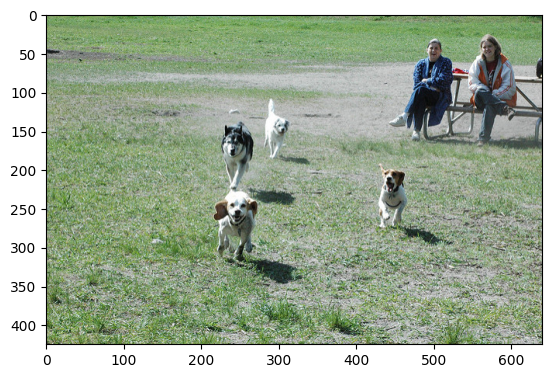

In [ ]:
imagem = skimage.io.imread('/content/Mask_RCNN/images/2516944023_d00345997d_z.jpg')
plt.imshow(imagem); # RGB

In [ ]:
class_names[17], class_names[1], class_names[14]

('dog', 'person', 'bench')

In [ ]:
resultados = network.detect([imagem], verbose=0)
resultados

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


[{'rois': array([[195, 426, 277, 467],
         [226, 216, 321, 273],
         [106, 280, 189, 314],
         [ 32, 445, 159, 527],
         [136, 225, 231, 268],
         [ 27, 541, 168, 607],
         [ 75, 476, 164, 634]], dtype=int32),
  'class_ids': array([17, 17, 17,  1, 17,  1, 14], dtype=int32),
  'scores': array([0.9997004 , 0.9996582 , 0.9996049 , 0.99913245, 0.99799263,
         0.997436  , 0.9165011 ], dtype=float32),
  'masks': array([[[False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          ...,
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False]],
  
         [[False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
       

In [ ]:
r = resultados[0]

In [ ]:
visualize.display_instances(imagem, r['rois'], r['masks'],
                            r['class_ids'], class_names, r['scores'])

Output hidden; open in https://colab.research.google.com to view.

## Remoção do Fundo

In [ ]:
np.unique(r['masks'], return_counts=True)

(array([False,  True]), array([1881592,   22408]))

In [ ]:
def segmentar(imagem, r, indice):
  mask = r['masks'][:,:,indice]
  mask = np.stack((mask,) * 3, axis = -1)
  mask = mask.astype('uint8')
  bg = 255 - mask * 255
  mask_show = np.invert(bg)
  mask_img = imagem * mask
  result = mask_img + bg
  return result, mask_show

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
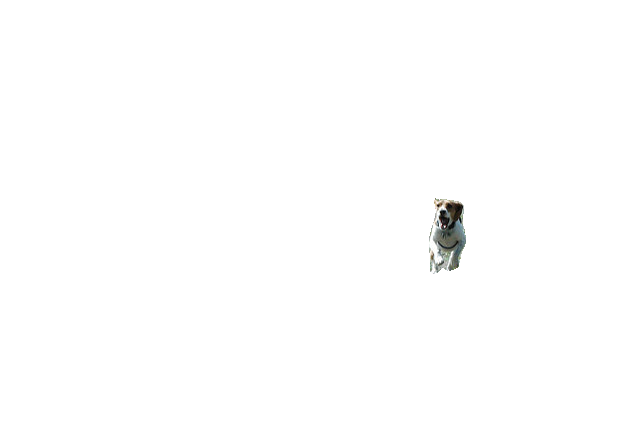

In [ ]:
segmentacao, mask_obj = segmentar(imagem, r, 0)
segmentacao

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
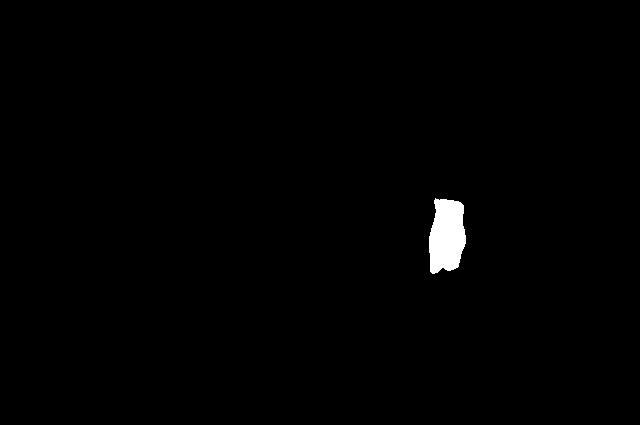

In [ ]:
mask_obj

In [ ]:
def mostra_segmentacao(imagem, r, indice, show_mask = False):
  segmentacao, mask_obj = segmentar(imagem, r, indice)
  plt.subplots(1, figsize=(16,16))
  plt.axis('off')
  if show_mask == True:
    plt.imshow(np.concatenate([mask_obj, segmentacao], axis = 1))
  else:
    plt.imshow(np.concatenate([imagem, segmentacao], axis = 1))

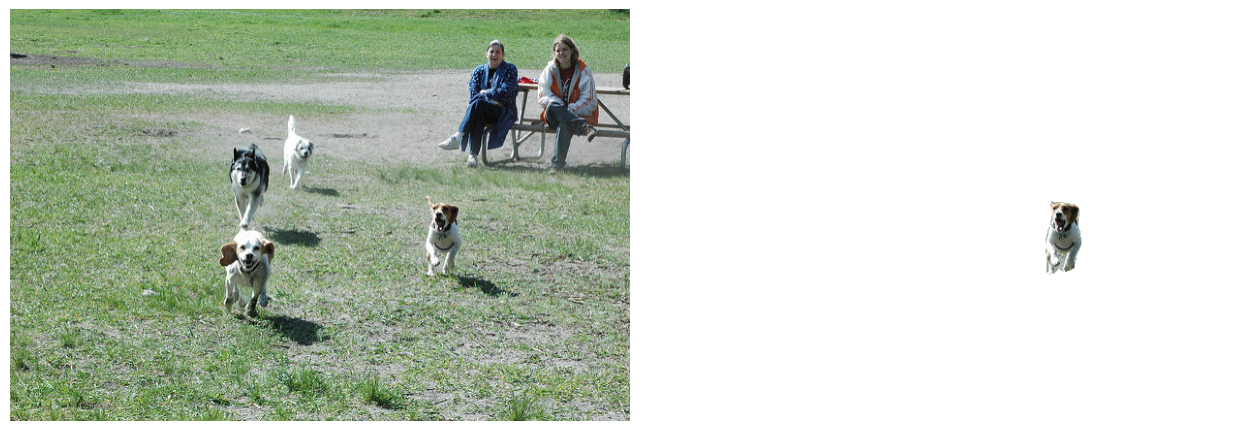

In [ ]:
mostra_segmentacao(imagem, r, 0, show_mask = False)

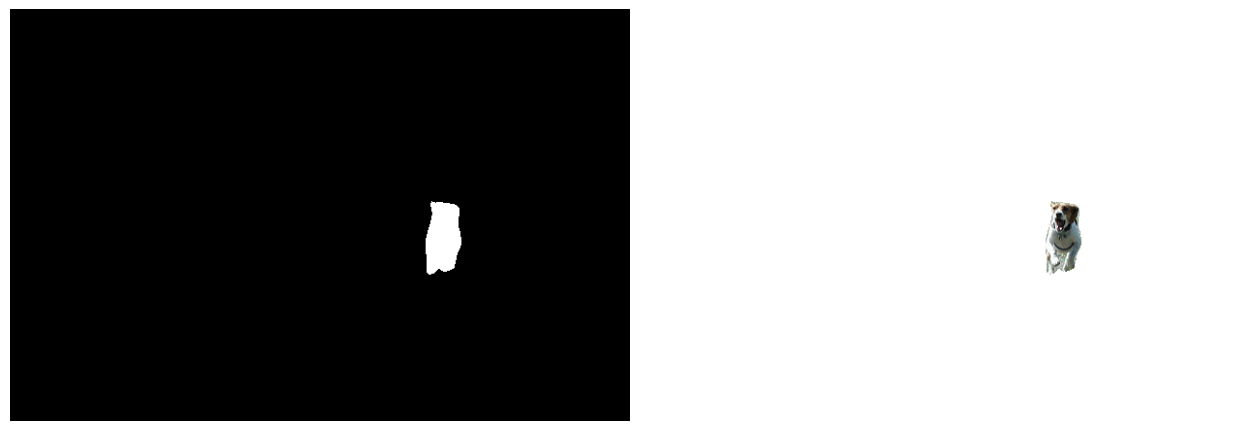

In [ ]:
mostra_segmentacao(imagem, r, 0, show_mask = True)

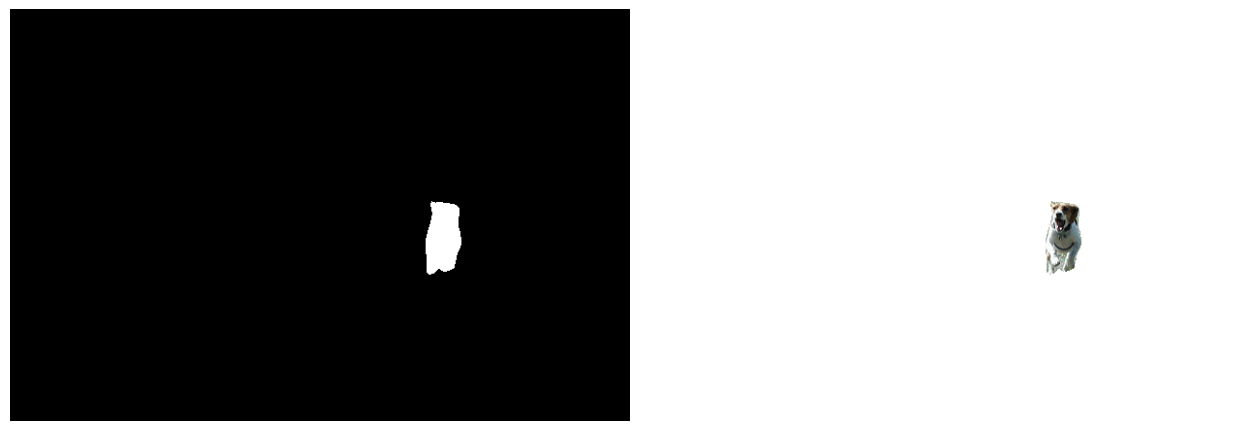

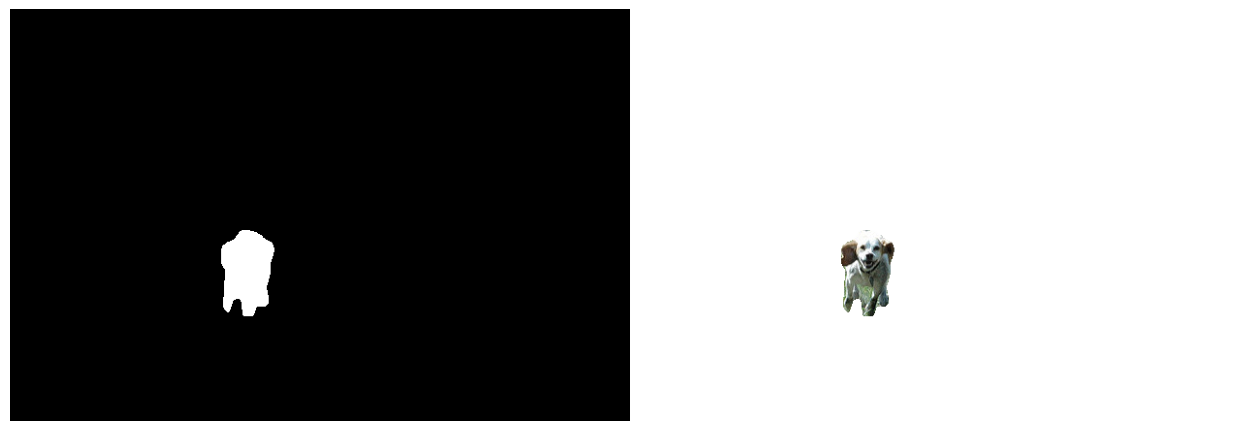

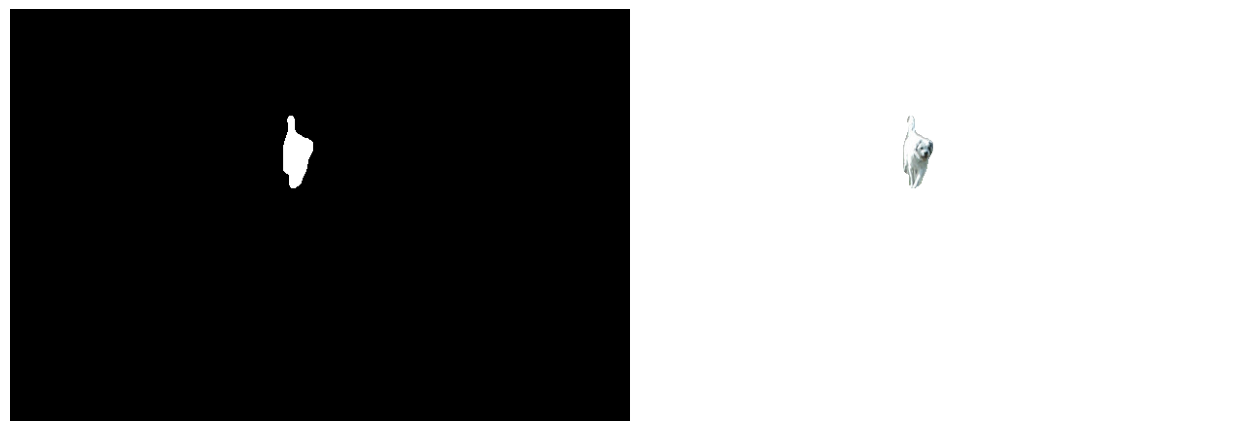

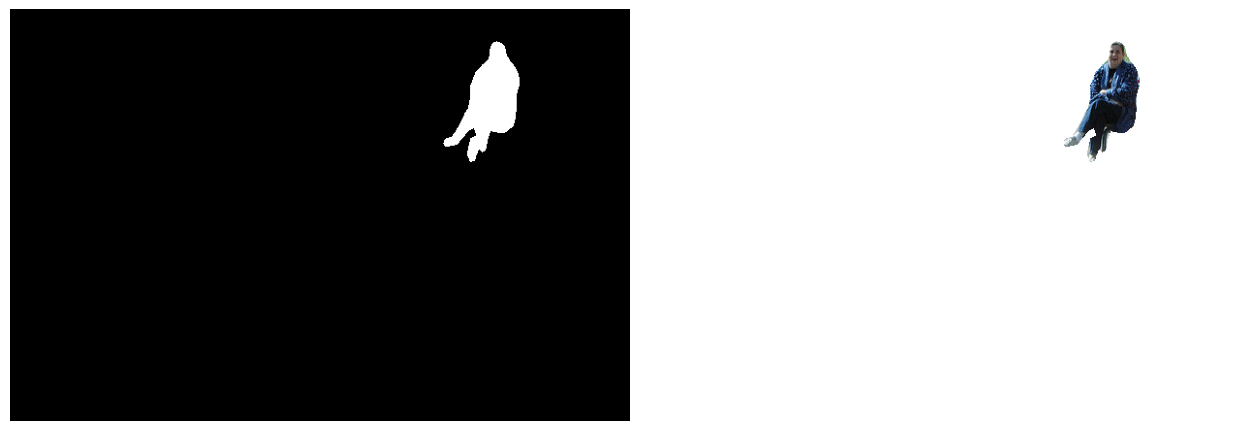

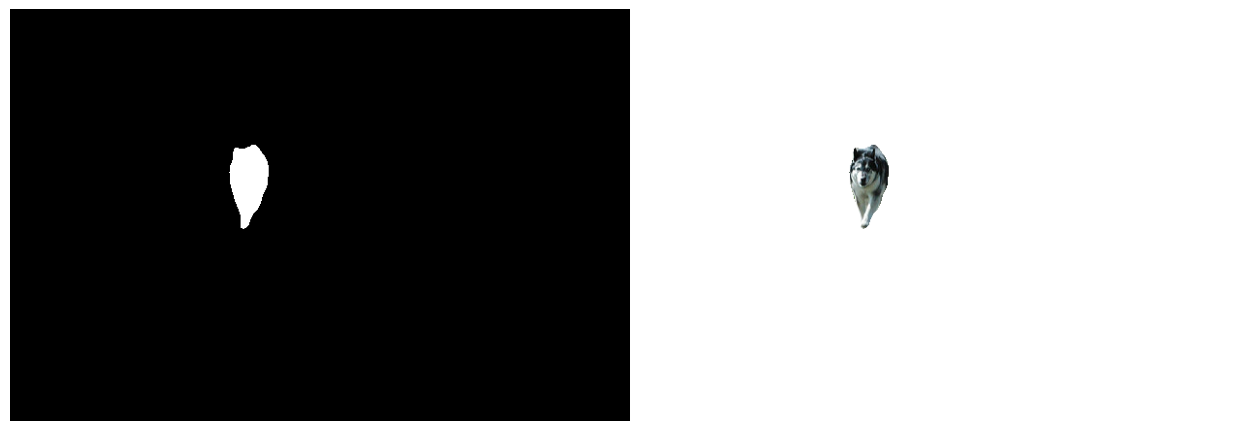

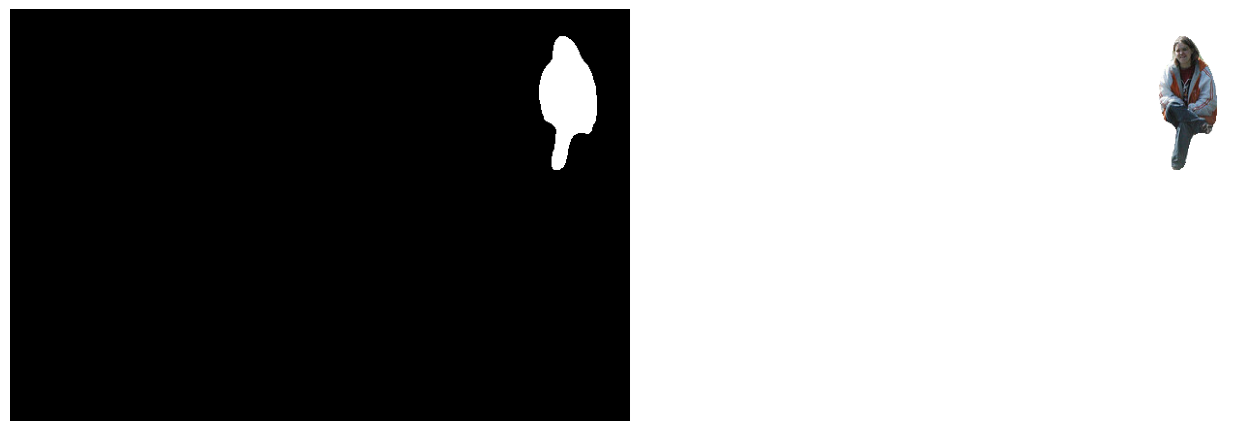

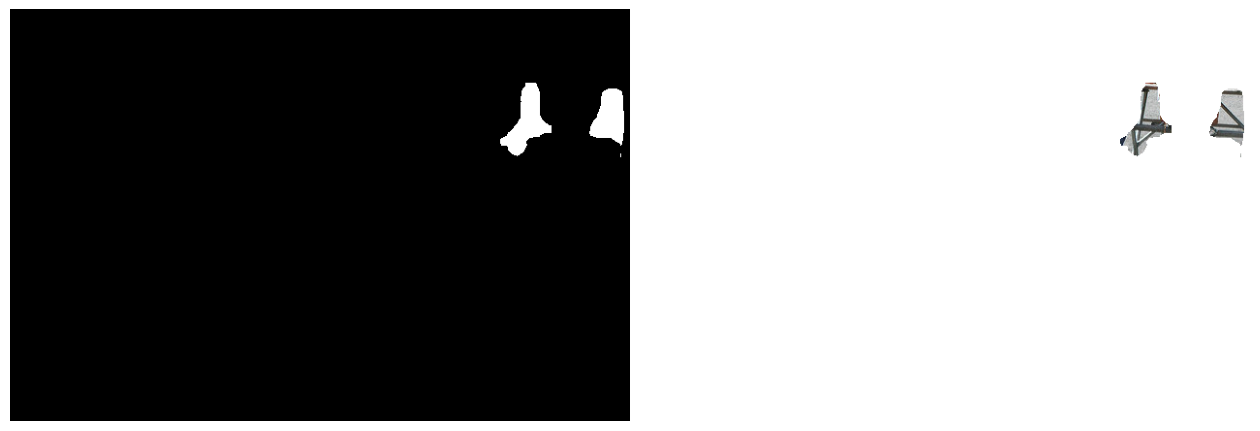

In [ ]:
for x in range(r['masks'].shape[2]):
  mostra_segmentacao(imagem, r, x, show_mask = True)

## ------------- EXERCICIO ---------

In [86]:
imagens = [os.path.join('/content/Mask_RCNN/images', f) for f in os.listdir('/content/Mask_RCNN/images')]
imagens

['/content/Mask_RCNN/images/3800883468_12af3c0b50_z.jpg',
 '/content/Mask_RCNN/images/0001.jpg',
 '/content/Mask_RCNN/images/12283150_12d37e6389_z.jpg',
 '/content/Mask_RCNN/images/3862500489_6fd195d183_z.jpg',
 '/content/Mask_RCNN/images/4410436637_7b0ca36ee7_z.jpg',
 '/content/Mask_RCNN/images/6821351586_59aa0dc110_z.jpg',
 '/content/Mask_RCNN/images/8433365521_9252889f9a_z.jpg',
 '/content/Mask_RCNN/images/8053677163_d4c8f416be_z.jpg',
 '/content/Mask_RCNN/images/3651581213_f81963d1dd_z.jpg',
 '/content/Mask_RCNN/images/6584515005_fce9cec486_z.jpg',
 '/content/Mask_RCNN/images/9118579087_f9ffa19e63_z.jpg',
 '/content/Mask_RCNN/images/3878153025_8fde829928_z.jpg',
 '/content/Mask_RCNN/images/2502287818_41e4b0c4fb_z.jpg',
 '/content/Mask_RCNN/images/3627527276_6fe8cd9bfe_z.jpg',
 '/content/Mask_RCNN/images/7581246086_cf7bbb7255_z.jpg',
 '/content/Mask_RCNN/images/7933423348_c30bd9bd4e_z.jpg',
 '/content/Mask_RCNN/images/8829708882_48f263491e_z.jpg',
 '/content/Mask_RCNN/images/4782628

In [95]:
count = 0
for imagem in imagens:
  imagem_atual = skimage.io.imread(imagem)

  resultados = network.detect([imagem_atual], verbose=0)
  r = resultados[0]

  visualize.display_instances(imagem_atual, r['rois'], r['masks'],
                            r['class_ids'], class_names, r['scores'])

Output hidden; open in https://colab.research.google.com to view.

## ------------- STORIES --------------

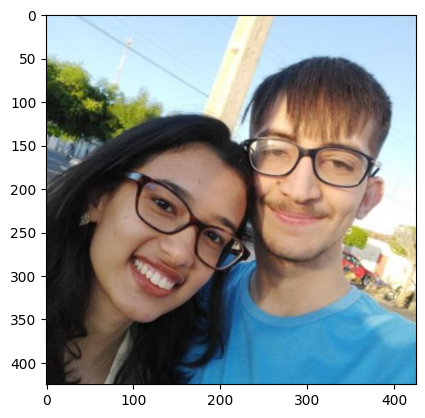

In [88]:
imagem = skimage.io.imread('/content/Mask_RCNN/images/0001.jpg')
plt.imshow(imagem); # RGB

In [89]:
resultados = network.detect([imagem], verbose=0)
resultados


[{'rois': array([[ 47, 170, 421, 420],
         [110,   0, 423, 244]], dtype=int32),
  'class_ids': array([1, 1], dtype=int32),
  'scores': array([0.99963486, 0.99922764], dtype=float32),
  'masks': array([[[False, False],
          [False, False],
          [False, False],
          ...,
          [False, False],
          [False, False],
          [False, False]],
  
         [[False, False],
          [False, False],
          [False, False],
          ...,
          [False, False],
          [False, False],
          [False, False]],
  
         [[False, False],
          [False, False],
          [False, False],
          ...,
          [False, False],
          [False, False],
          [False, False]],
  
         ...,
  
         [[False, False],
          [False, False],
          [False, False],
          ...,
          [False, False],
          [False, False],
          [False, False]],
  
         [[False, False],
          [False, False],
          [False, False],
        

In [90]:
r = resultados[0]

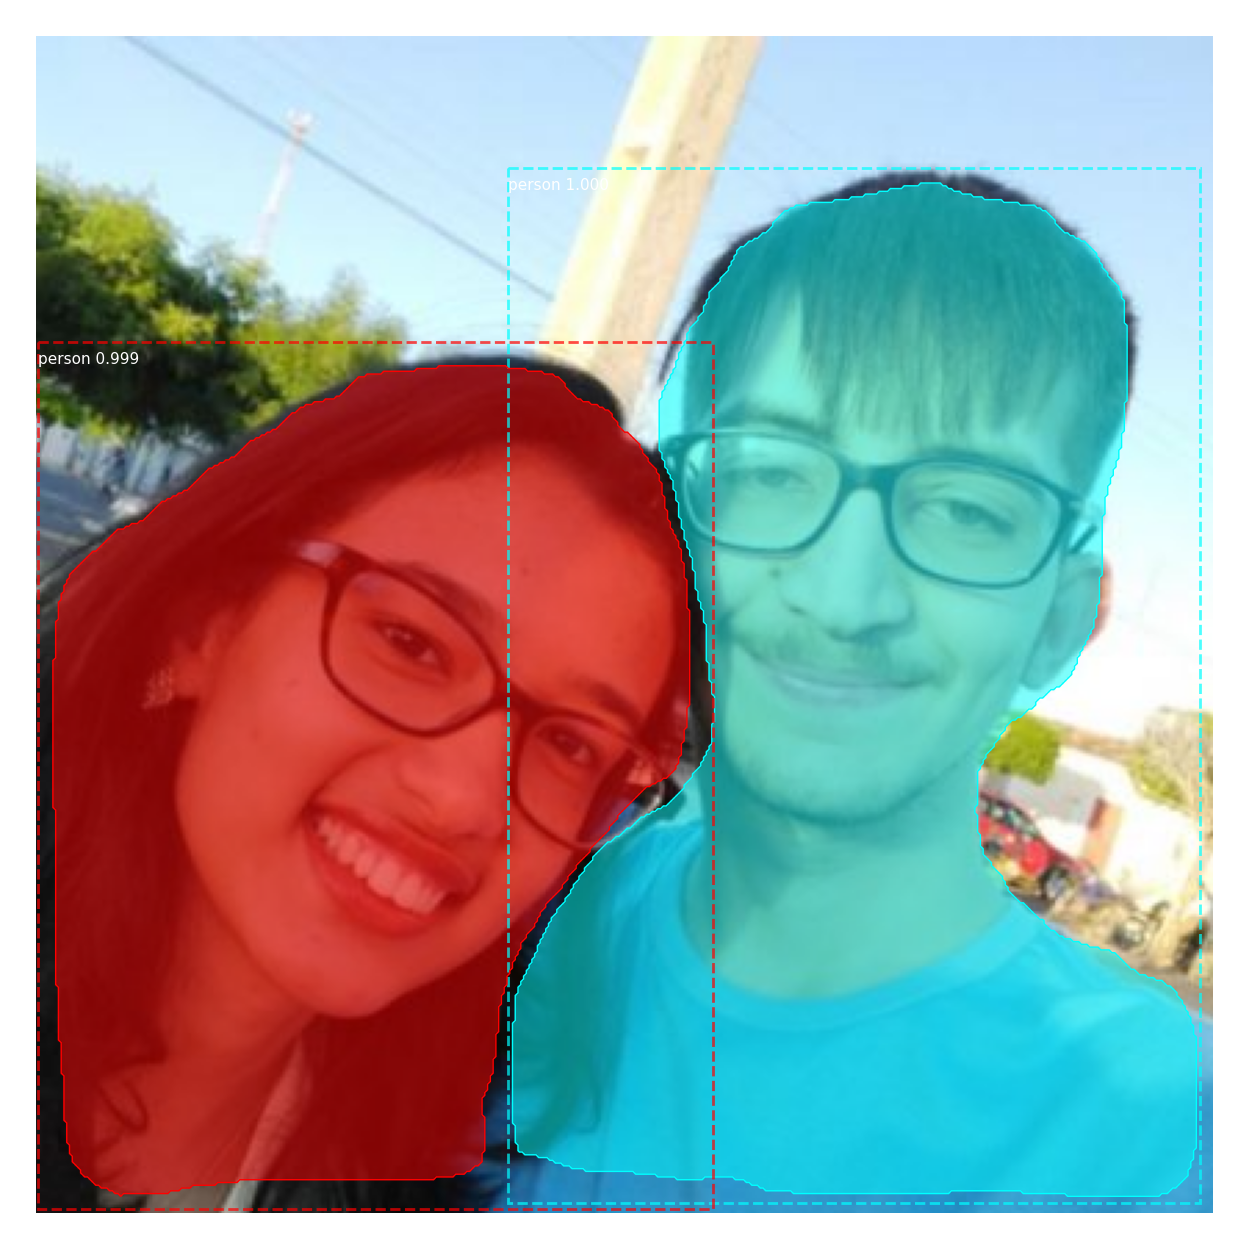

In [91]:
visualize.display_instances(imagem, r['rois'], r['masks'],
                            r['class_ids'], class_names, r['scores'])

In [92]:
np.unique(r['masks'], return_counts=True)

(array([False,  True]), array([249102, 112148]))

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
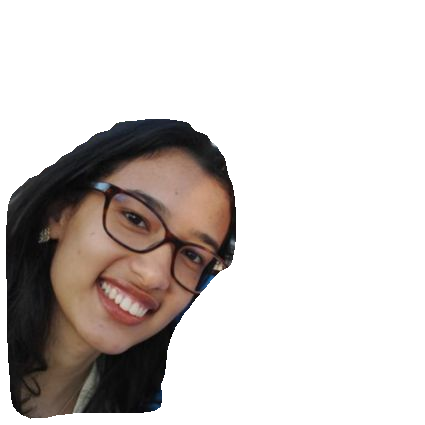

In [94]:
segmentacao, mask_obj = segmentar(imagem, r, 1)
segmentacao